In [31]:
import sys
sys.path.insert(0, '../')
from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline

In [39]:
np.random.RandomState(10)
N_points = 50
N_neurons = N_points*2
x = np.random.rand(N_points)
y = np.random.rand(N_points)

In [63]:
som = MiniSom(1, N_neurons, 2, sigma=3, 
              neighborhood_function='triangle')
points = np.array([x,y]).T
som.pca_weights_init(points)
som.train_batch(points, 1000, verbose=True)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.0305867179992607
 topographic error: 0.16


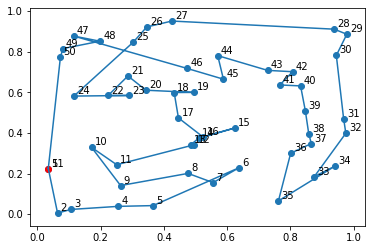

In [64]:
plt.scatter(x,y)
visit_order = np.argsort([som.winner(p)[1] for p in points])
visit_order = np.concatenate((visit_order, [visit_order[0]]))
plt.plot(points[visit_order][:,0], points[visit_order][:,1])
for i, p in enumerate(points[visit_order]):
    plt.text(p[0]+.01, p[1]+.01, str(i+1))
plt.scatter(points[visit_order][0][0], 
            points[visit_order][0][1], c='red')